In [1]:
import os
os.system("mkdir ../data/")
os.system("mkdir ../outputs/")
os.system("mkdir ../outputs/figures/")
os.system("mkdir ../outputs/skills/")
import numpy as np

In [2]:
# Code to convert any day / radar to ".pickle" file for processing
#from pickle_creator import to_pickle_files
#import datetime as dt
#rads = ["bks"]
#dates = [dt.datetime(2010, 1, 15)]
#to_pickle_files(dates, rads)

In [3]:
# Run analysis and create RTI plots
#from statistics import run_algorithm
#import datetime as dt
#rad = "bks"
#date = dt.datetime(2010, 1, 15)
#a_name="dbscan"
#run_algorithm(rad, date, date+dt.timedelta(days=1), a_name, gmm=False, 
#              parameters = ['gate', 'beam', 'vel', 'wid', 'time', 'trad_gsflg', 'pow', 'clust_flg'],
#              isgs={"thresh":[0.5,0.6], "pth":0.5}, plot_beams=[7], 
#              plot_params=["vel", "wid", "pow", "cluster", "isgs", "cum_isgs"], save=True)

In [4]:
#import plotlib
#import datetime as dt
#plotlib.histograms_skill_scores(["bks"], "dbscan", [dt.datetime(2010,1,1)], [dt.datetime(2010,1,31)], gmm=True)
#plotlib.histograms_scatters(["bks"], "dbscan", [dt.datetime(2010,1,1)], [dt.datetime(2010,1,31)], gmm=False)
#plotlib.histograms_scatters(["bks"], "dbscan", [dt.datetime(2010,1,1)], [dt.datetime(2010,1,31)], gmm=False, sctr=0,
#                           fp_details={
#                           "v": {"dist": 7, "ids":[2,3,4,5], "bins":100, "ylim":[0,0.8], "rot":45, "dh":0.05, "log":True},
#                           "w_l": {"dist": 7, "ids":[2,3,4], "bins":100, "ylim":[0,1], "rot":45, "dh":0.07, "log":True},
#                           "p": {"dist": 7, "ids":[1], "bins":100, "ylim":[0,0.4], "rot":45, "dh":0.03, "log":False}
#                       })
#plotlib.histograms_scatters(["bks"], "dbscan", [dt.datetime(2010,1,1)], [dt.datetime(2010,1,31)], gmm=False, sctr=1,
#                           fp_details={
#                           "v": {"dist": 7, "ids":[4,5], "bins":100, "ylim":[0,0.7], "rot":45, "dh":0.05, "log":True},
#                           "w_l": {"dist": 7, "ids":[2], "bins":100, "ylim":[0,1], "rot":45, "dh":0.07, "log":True},
#                           "p": {"dist": 7, "ids":[0], "bins":100, "ylim":[0,0.4], "rot":45, "dh":0.03, "log":False}
#                       })

In [5]:
import pandas as pd
X = pd.read_csv("../outputs/skill.csv")
from IPython.display import display, HTML

##############
# bhscore - Lower
# chscore - Higher
# xuscore - Lower
##############
display(HTML(X[["chscore","bhscore","xuscore","gmm","model","rad","event_type"]].to_html()))

,chscore,bhscore,xuscore,gmm,model,rad,event_type
0,3.68398,4625760.0,0.936718,False,dbscan,cvw,quiet
1,10.35080,12233800.0,3.123100,False,dbscan,sas,quiet
2,11.90180,4893730.0,1.900590,False,dbscan,cvw,active
3,9.74139,6741510.0,3.785010,False,dbscan,sas,active
4,4.79818,4424800.0,0.961452,True,dbscan,cvw,quiet
5,14.10780,11738400.0,3.116150,True,dbscan,sas,quiet
6,20.62280,4359630.0,1.917850,True,dbscan,cvw,active
7,17.91590,6226920.0,3.684460,True,dbscan,sas,active
8,10.64810,14293700.0,-0.317096,False,gb-dbscan,cvw,quiet
9,12.84090,28860700.0,2.745220,False,gb-dbscan,sas,quiet


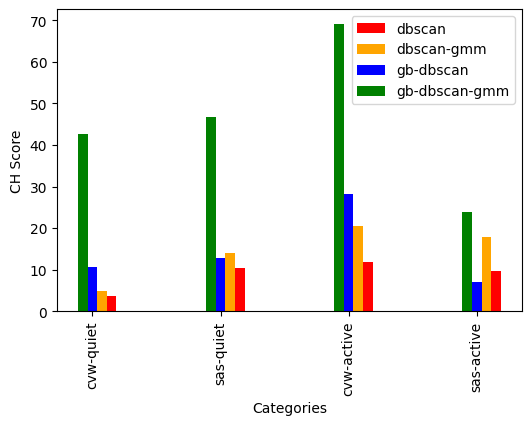

In [59]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(dpi=100)
width = 0.3
x = np.arange(4)*2
cols = ["red", "orange", "blue", "green"]
i = 0
for algo in ["dbscan", "gb-dbscan"]:
    for gmm in [False, True]:
        tag = "-gmm" if gmm else ""
        ax.bar(x - i*width/2, X[(X.model==algo) & (X.gmm==gmm)].chscore, width/2, color=cols[i], label=algo+tag)
        i+=1

ax.set_xticks([])
ax.set_xticks([-width,2-width,4-width,6-width])
ax.set_xticklabels(["cvw-quiet", "sas-quiet", "cvw-active", "sas-active",], rotation=90)
ax.set_ylabel("CH Score")
ax.set_xlabel("Categories")
ax.legend()
fig.savefig("score-summary.png", bbox_inches="tight")